In [1]:
import os
from rasterio.plot import show
from rasterio.merge import merge
import rasterio 
from scripts.raster_preparation import reproject_raster, clip_raster

from tqdm import tqdm
import geopandas as gpd
%load_ext autoreload
%autoreload 2


Первоочередная задача для нас тут получить общий растр  и объеденить его а затем клипнуть по геометрии которую мы сделали в кугис , перед этим надо привести все растры к общему знаменателю то есть перепроицировать их, я буду перепроицировать его в систему Буденовского района, тоесть в ютм 38Н

In [2]:
rasters_files = os.listdir('./data/row_rasters')

In [3]:
dstCrs = 'EPSG:32638'


In [4]:
for i in tqdm(rasters_files):
    reproject_raster(i, dstCrs )
    

 12%|█▏        | 3/26 [00:01<00:09,  2.40it/s]

CRS is the same
CRS is the same
CRS is the same
CRS is the same


 27%|██▋       | 7/26 [00:01<00:02,  6.48it/s]

CRS is the same
CRS is the same
CRS is the same
CRS is the same


 46%|████▌     | 12/26 [00:02<00:01, 11.59it/s]

CRS is the same
CRS is the same
CRS is the same
CRS is the same
CRS is the same


 62%|██████▏   | 16/26 [00:02<00:00, 14.37it/s]

CRS is the same
CRS is the same
CRS is the same
CRS is the same
CRS is the same


 85%|████████▍ | 22/26 [00:02<00:00, 16.83it/s]

CRS is the same
CRS is the same
CRS is the same
CRS is the same


100%|██████████| 26/26 [00:02<00:00,  9.71it/s]

CRS is the same
CRS is the same
CRS is the same
CRS is the same


In [23]:
vector_to_clip = gpd.read_file('./data/geoms/train_grid.geojson')

<AxesSubplot:>

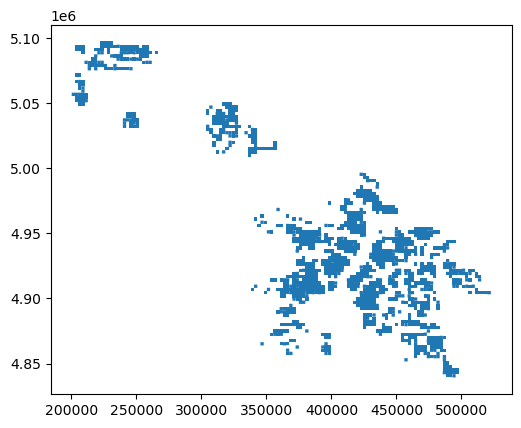

In [24]:
vector_to_clip.plot()

In [25]:
vector_to_clip['dist'] = vector_to_clip.NAME_EN.str.split(expand = True)[0]                              


In [26]:
id = vector_to_clip.iloc[0].fid
district = vector_to_clip.iloc[0].dist
geom = vector_to_clip.iloc[0].geometry




In [27]:
vector_to_clip.shape[0]

1253

In [28]:
vector_to_clip.dist.unique()

array(['Georgiyevsky', 'Mineralovodsky', 'Novoselitsky', 'Sovetsky',
       'Levokumsky', 'Neftecumsky', 'Alexandrovsky', 'Budyonnovsky',
       'Predgorny', 'Krasnogvardeysky', 'Stepnovsky', 'Petrovsky',
       'Izobilnensky', 'Novoalexandrovsky', 'Kirovsky', 'Kursky'],
      dtype=object)

In [2]:
for i in tqdm(range(vector_to_clip.shape[0])): 
    id = grid.iloc[i].fid
    district = vector_to_clip.iloc[i].dist
    geom = vector_to_clip.iloc[i].geometry
    clip_raster(f'./data/row_rasters/{district}.tif', [geom], id, dstCrs)
    clip_raster(f'./data/mask_raster.tif', [geom], id, dstCrs, m = True)

NameError: name 'vector_to_clip' is not defined